MEHMET ILYAS INCE

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [63]:
df=pd.read_csv("../heart.csv")

In [64]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [65]:
#output heart attack 
y=df["output"]
x=df.drop(["output"], axis=1)

# MODELS WITHOUT SPLIT

In [66]:
#Linear Regression
linearModel1=LinearRegression()
linearModel1.fit(x,y)
linearRegression_noSplit=linearModel1.score(x,y)

In [67]:
#Logistic Regression
linearModel2=LogisticRegression()
linearModel2.fit(x,y)
logisticRegression_noSplit=linearModel2.score(x,y)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
#Decision Tree
treeModel=DecisionTreeClassifier()
treeModel.fit(x,y)
decisionTree_noSplit=treeModel.score(x,y)


In [69]:
#Random Forest Tree
treeModel2=RandomForestClassifier()
treeModel2.fit(x,y)
randomForest_noSplit=treeModel2.score(x,y)

In [70]:
#XGBBoost
xgbModel=xgb.XGBClassifier()
xgbModel.fit(x,y)
xgbScore_noSplit=xgbModel.score(x,y)

# MODELS WITH SPLIT SETS

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=31,train_size=0.7)

In [72]:
#LinearRegression
linearModel2=LinearRegression()
linearModel2.fit(x_train,y_train)
linearRegressionScore=linearModel2.score(x_test,y_test)

In [73]:
#Logistic Regression
linearModel3=LogisticRegression()
linearModel3.fit(x_train,y_train)
logisticRegressionScore=linearModel3.score(x_test,y_test)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
#Decision Tree
treeModel2=DecisionTreeClassifier()
treeModel2.fit(x_train,y_train)
decisionTreeScore=treeModel2.score(x_test,y_test)


In [75]:
#Random Forest Tree
treeModel3=RandomForestClassifier()
treeModel3.fit(x_train,y_train)
randomForestScore=treeModel3.score(x_test,y_test)

In [76]:
#XGBoost
xgbModel1=xgb.XGBClassifier()
xgbModel1.fit(x_train,y_train)
xgbScore=xgbModel1.score(x_test,y_test)

In [77]:
print("Linear Regression Score.  :", linearRegressionScore)
print("Logistic Regression Score :", logisticRegressionScore)
print("Decision Tree Score.      :", decisionTreeScore)
print("Random Forest Tree Score. :", randomForestScore)
print("XGBBoost Score            :", xgbScore)

Linear Regression Score.  : 0.48006012900266326
Logistic Regression Score : 0.8681318681318682
Decision Tree Score.      : 0.7582417582417582
Random Forest Tree Score. : 0.8241758241758241
XGBBoost Score            : 0.7692307692307693


# COMPARISON CHARTS

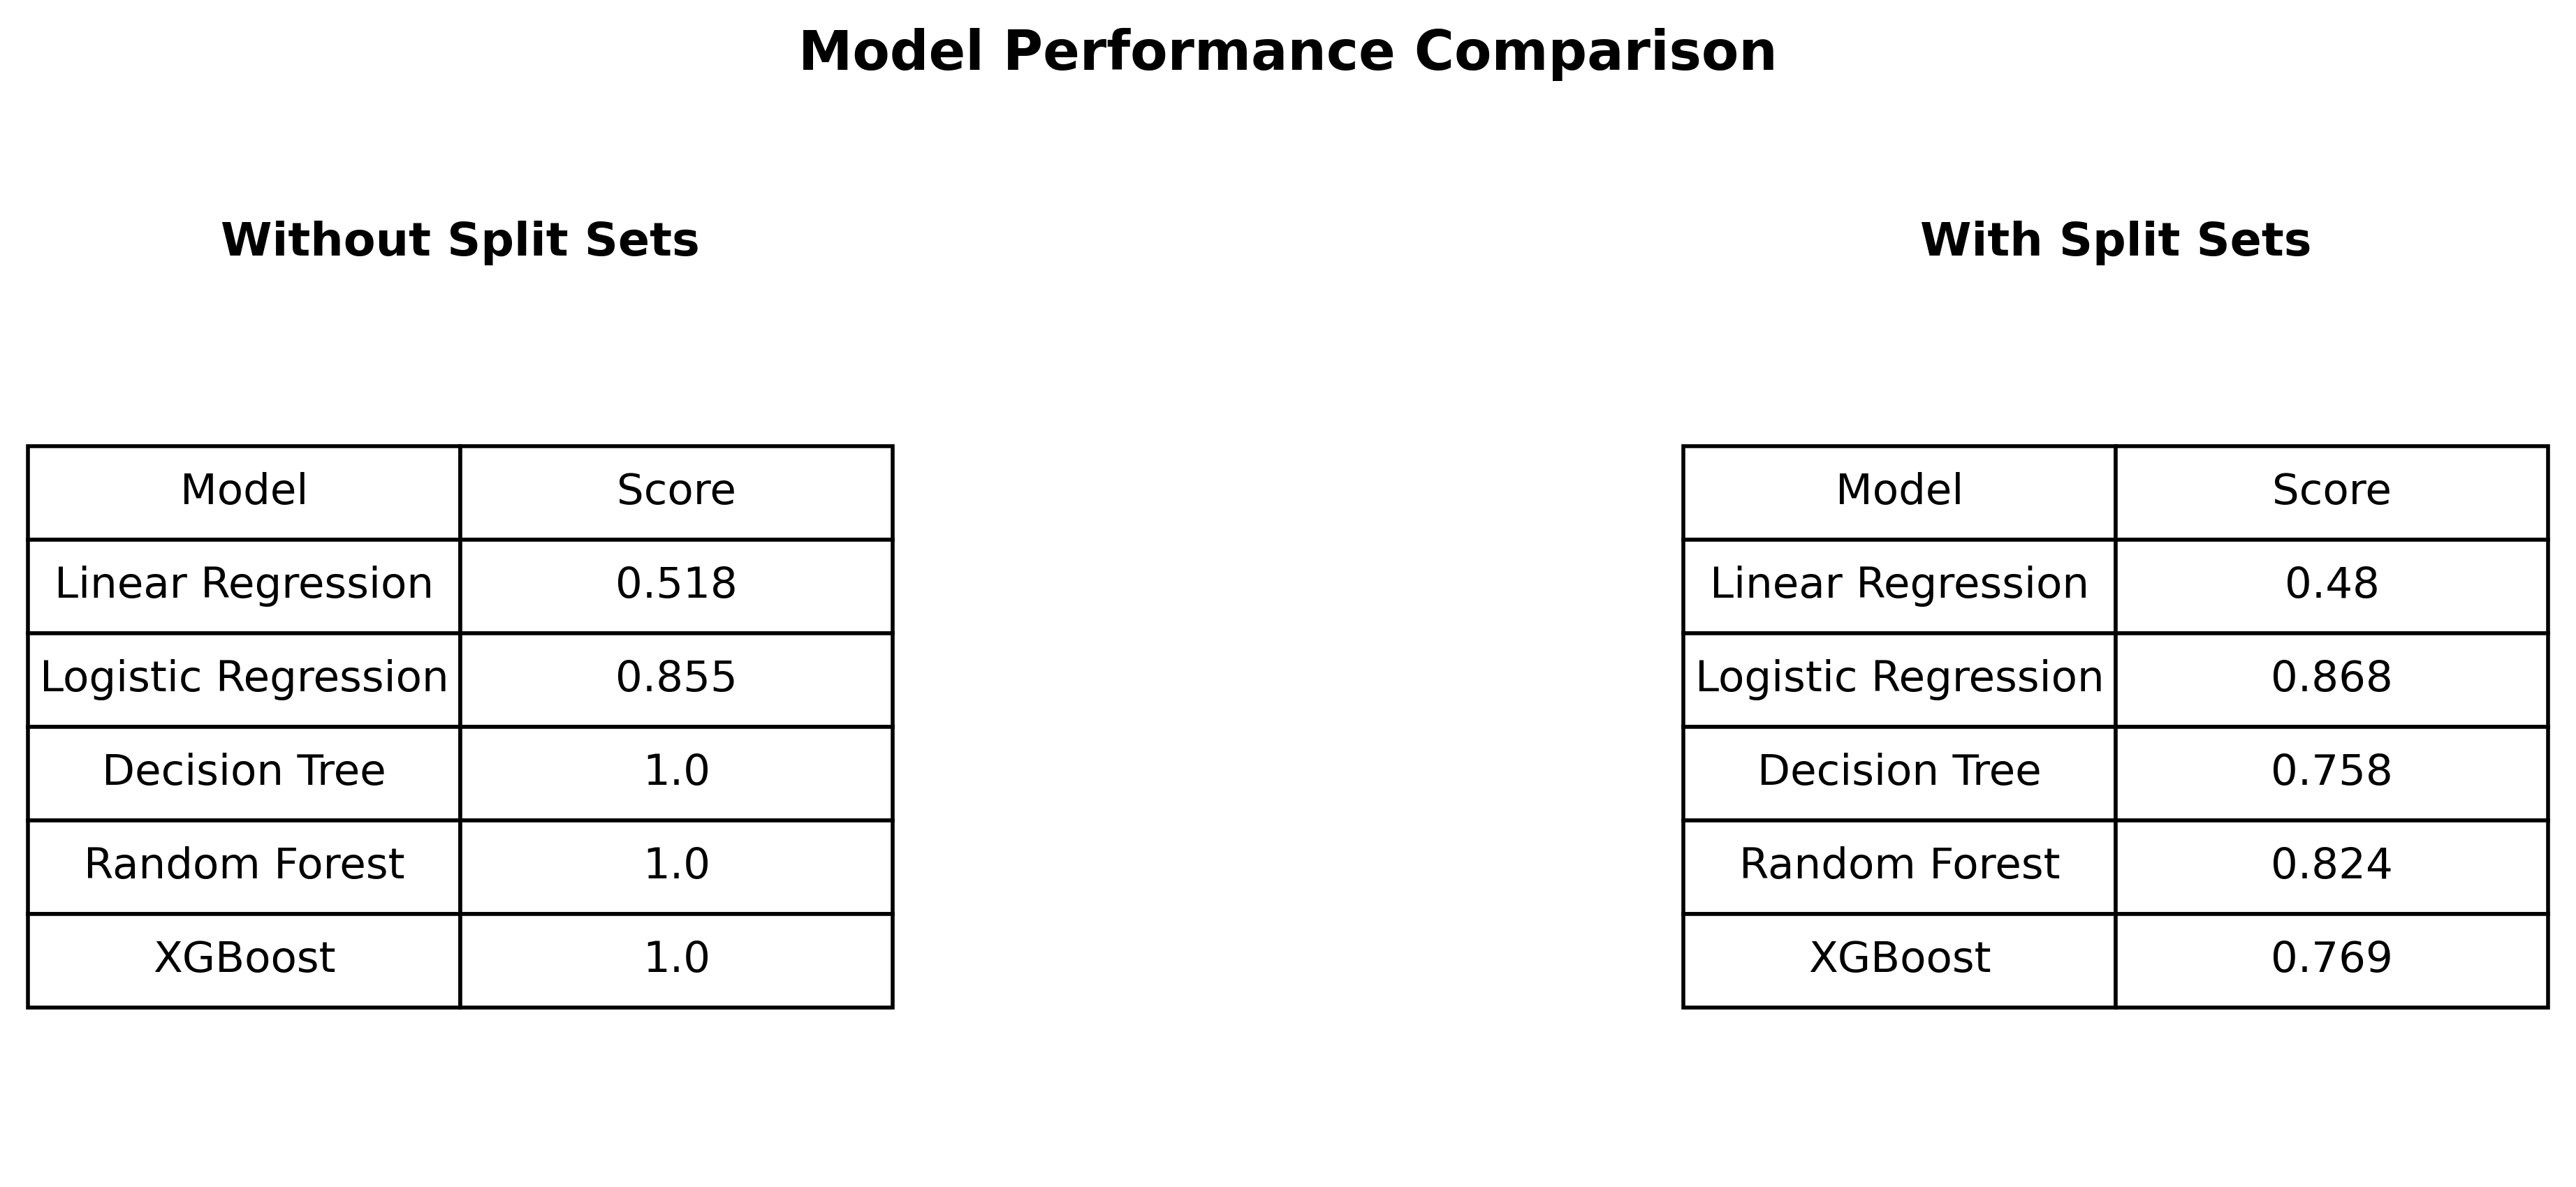

In [78]:
import matplotlib.pyplot as plt

def round_scores(data):
    return [[model, round(score, 3)] for model, score in data]

data_noSplit = round_scores([
    ['Linear Regression', linearRegression_noSplit],
    ['Logistic Regression', logisticRegression_noSplit],
    ['Decision Tree', decisionTree_noSplit],
    ['Random Forest', randomForest_noSplit],
    ['XGBoost', xgbScore_noSplit],
])

data_split = round_scores([
    ['Linear Regression', linearRegressionScore],
    ['Logistic Regression', logisticRegressionScore],
    ['Decision Tree', decisionTreeScore],
    ['Random Forest', randomForestScore],
    ['XGBoost', xgbScore],
])


columns = ['Model', 'Score']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=400)

ax1.axis('off')
table1 = ax1.table(cellText=data_noSplit, colLabels=columns, loc='center', cellLoc='center')
table1.scale(2, 2)
table1.auto_set_font_size(False)
table1.set_fontsize(11)
ax1.set_title("Without Split Sets", fontweight="bold", pad=10)

ax2.axis('off')
table2 = ax2.table(cellText=data_split, colLabels=columns, loc='center', cellLoc='center')
table2.scale(2, 2)
table2.auto_set_font_size(False)
table2.set_fontsize(11)
ax2.set_title("With Split Sets", fontweight="bold", pad=10)

plt.suptitle("Model Performance Comparison", fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


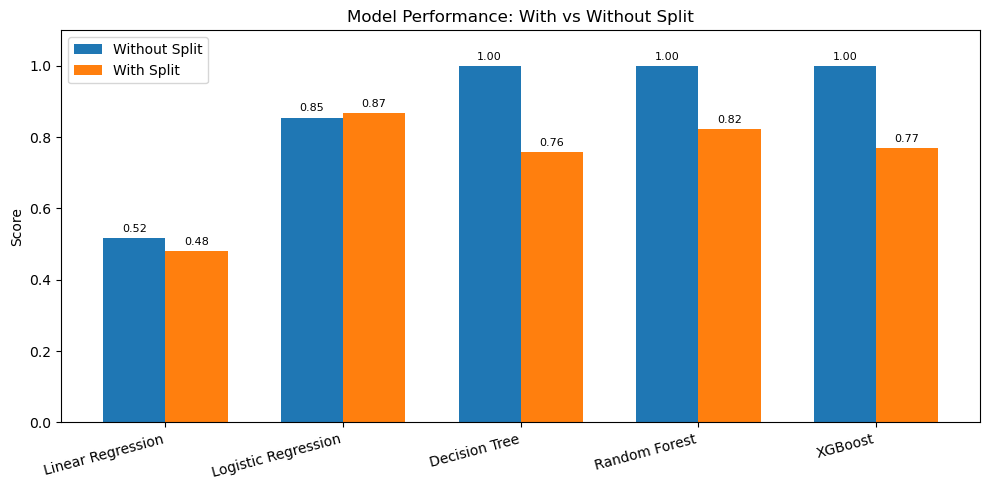

In [79]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

no_split_scores = [
    round(linearRegression_noSplit, 3),
    round(logisticRegression_noSplit, 3),
    round(decisionTree_noSplit, 3),
    round(randomForest_noSplit, 3),
    round(xgbScore_noSplit, 3)
]

split_scores = [
    round(linearRegressionScore, 3),
    round(logisticRegressionScore, 3),
    round(decisionTreeScore, 3),
    round(randomForestScore, 3),
    round(xgbScore, 3)
]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, no_split_scores, width, label='Without Split')
bars2 = ax.bar(x + width/2, split_scores, width, label='With Split')

ax.set_ylabel('Score')
ax.set_title('Model Performance: With vs Without Split')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.set_ylim(0, 1.1)
ax.legend()


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
